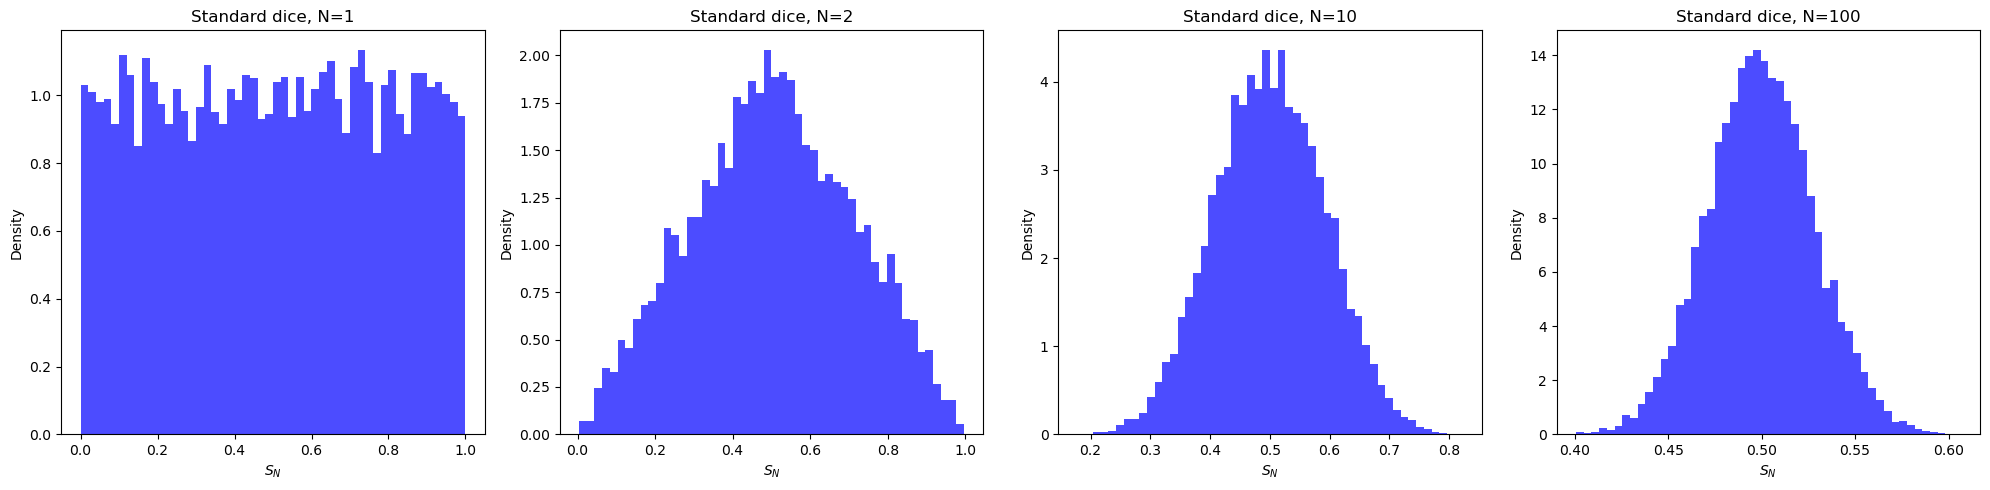

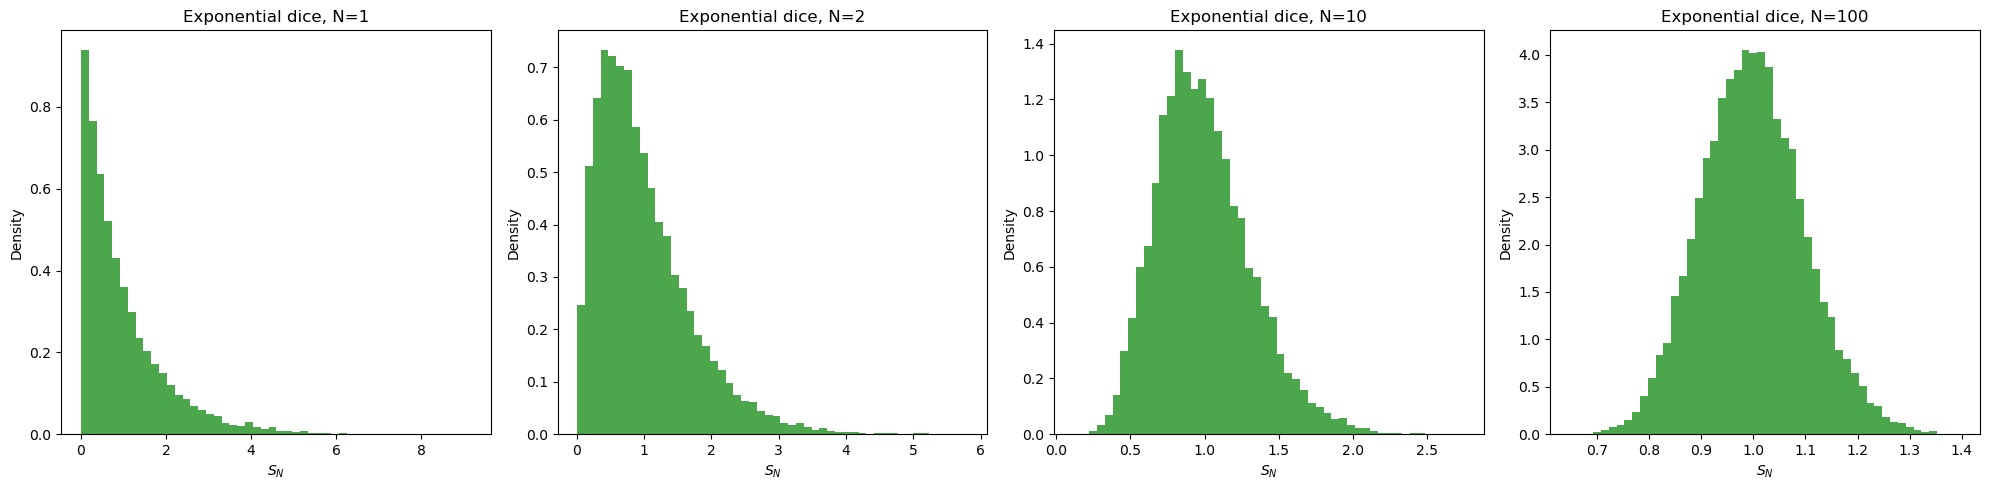

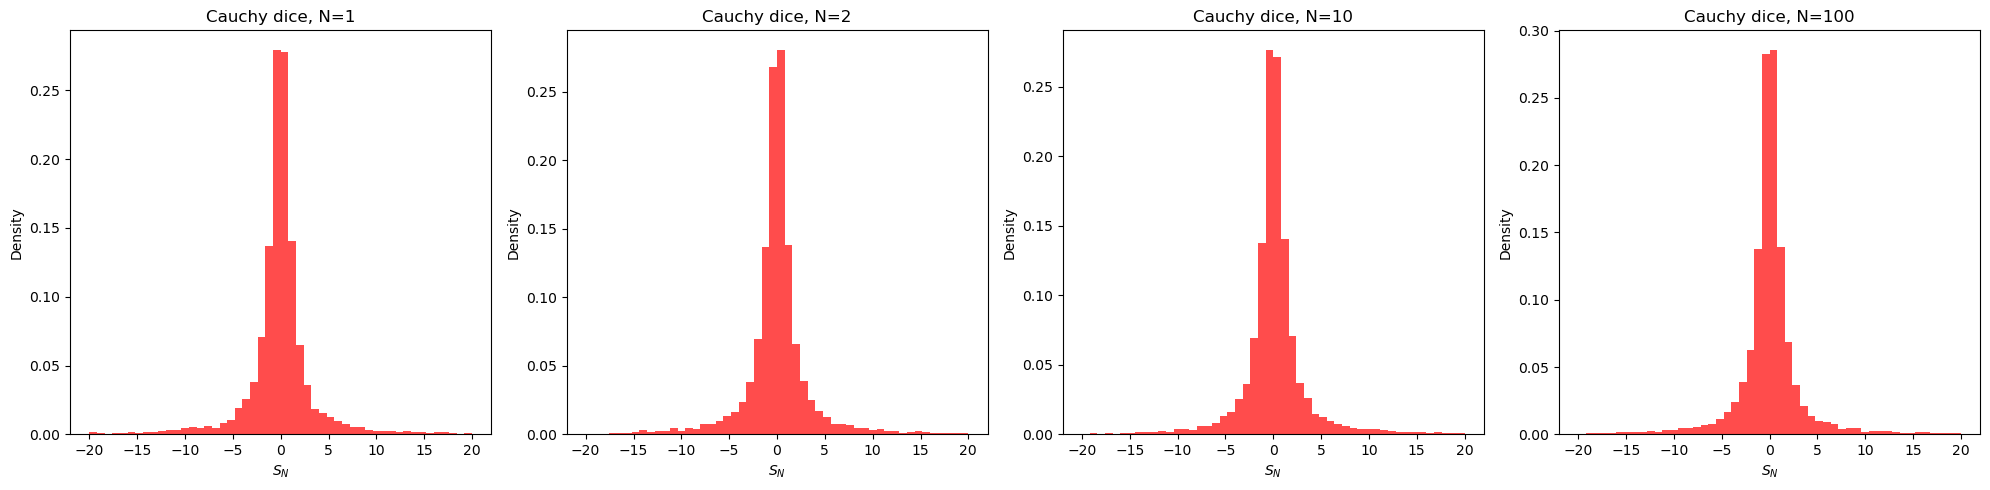

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ================================================
# CARICAMENTO DEI DATI
# ================================================

# Carica i dati relativi al dado con distribuzione uniforme [0,1]
data_standard = [
    np.loadtxt("Es01_2Standard_1.txt"),   # N = 1
    np.loadtxt("Es01_2Standard_2.txt"),   # N = 2
    np.loadtxt("Es01_2Standard_10.txt"),  # N = 10
    np.loadtxt("Es01_2Standard_100.txt")  # N = 100
]

# Carica i dati relativi al dado esponenziale (lambda = 1)
data_exp = [
    np.loadtxt("Es01_2Exp_1.txt"),
    np.loadtxt("Es01_2Exp_2.txt"),
    np.loadtxt("Es01_2Exp_10.txt"),
    np.loadtxt("Es01_2Exp_100.txt")
]

# Carica i dati relativi al dado di Cauchy (mu = 0, gamma = 1)
data_cauchy = [
    np.loadtxt("Es01_2Cauchy_1.txt"),
    np.loadtxt("Es01_2Cauchy_2.txt"),
    np.loadtxt("Es01_2Cauchy_10.txt"),
    np.loadtxt("Es01_2Cauchy_100.txt")
]

# Titoli per i pannelli dei grafici, associati ai diversi valori di N
N_titles = ["N=1", "N=2", "N=10", "N=100"]

# ================================================
# GRAFICO 1: Distribuzioni dei S_N per il dado uniforme
# ================================================

# Crea una figura con 1 riga e 4 colonne di sottografi (subplot)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # figsize definisce le dimensioni della figura

# Itera sui quattro assi per creare un istogramma per ciascun valore di N
for i, ax in enumerate(axes):
    ax.hist(data_standard[i], bins=50, density=True, alpha=0.7, color='blue')  # Istogramma normalizzato
    ax.set_title("Standard dice, " + N_titles[i])  # Titolo del singolo subplot
    ax.set_xlabel("$S_N$")  # Etichetta asse x (media dei lanci)
    ax.set_ylabel("Density")  # Etichetta asse y

# Regola automaticamente i margini per evitare sovrapposizioni
plt.tight_layout()
plt.show()

# ================================================
# GRAFICO 2: Distribuzioni dei S_N per il dado esponenziale
# ================================================
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.hist(data_exp[i], bins=50, density=True, alpha=0.7, color='green')
    ax.set_title("Exponential dice, " + N_titles[i])
    ax.set_xlabel("$S_N$")
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

# ================================================
# GRAFICO 3: Distribuzioni dei S_N per il dado di Cauchy
# ================================================
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, ax in enumerate(axes):
    ax.hist(data_cauchy[i], range=(-20, 20), bins=50, density=True, alpha=0.7, color='red')  # Range limitato per evitare code troppo estese
    ax.set_title("Cauchy dice, " + N_titles[i])
    ax.set_xlabel("$S_N$")
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()




In questo esercizio verifichiamo il **Teorema del Limite Centrale (CLT)** generando variabili casuali da tre distribuzioni diverse e osservando il comportamento della loro media campionaria:

$$
S_N = \frac{1}{N} \sum_{i=1}^N x_i
$$

dove $x_i$ sono variabili casuali indipendenti e distribuite secondo:

- una distribuzione **uniforme discreta** (lancio di un dado standard),  
- una distribuzione **esponenziale**,  
- una distribuzione **Cauchy-Lorentz**.

---

### 🎲 Distribuzioni campionate

#### 1. Dado standard (uniforme discreta)

Ogni valore $x_i$ è ottenuto da un lancio di dado a 6 facce.  
La distribuzione ha **media finita** e **varianza finita**, quindi ci aspettiamo che per $N \gg 1$ la distribuzione di $S_N$ tenda a una **Gaussiana**, secondo il Teorema del Limite Centrale.

#### 2. Distribuzione esponenziale

Variabili distribuite secondo la **legge esponenziale** (con $\lambda = 1$):

$$
p(x) = \lambda \, e^{-\lambda x}, \quad x \in [0, +\infty)
$$

Anche in questo caso la media e la varianza sono finite:  
- $\langle x \rangle = \dfrac{1}{\lambda} = 1$  
- $\mathrm{Var}(x) = \dfrac{1}{\lambda^2} = 1$

Quindi anche qui, per $N \gg 1$, $S_N$ dovrebbe tendere a una **distribuzione normale**.

#### 3. Distribuzione Cauchy-Lorentz

Distribuzione con densità:

$$
p(x) = \frac{1}{\pi} \,\frac{\gamma}{(x - \mu)^2 + \gamma^2}
$$

Nel nostro caso: $\mu = 0$, $\gamma = 1$.  
Questa distribuzione **non ha media né varianza finite**, quindi il Teorema del Limite Centrale **non si applica**.

Anche aumentando $N$, la distribuzione di $S_N$ **rimane Lorentziana** e non converge a una Gaussiana.

---

### 📊 Obiettivo

Per ciascuna delle tre distribuzioni, abbiamo generato $10^4$ valori di $S_N$ per:

- $N = 1$  
- $N = 2$  
- $N = 10$  
- $N = 100$

e tracciato gli **istogrammi** risultanti:

- **Figura 1:** Dado standard  
- **Figura 2:** Distribuzione esponenziale  
- **Figura 3:** Distribuzione Cauchy

Nel caso **uniforme discreto** ed **esponenziale**, per $N = 100$ la distribuzione si avvicina visivamente a una **Gaussiana**.  
Nel caso **Lorentziano**, la distribuzione resta larga e pesantemente centrata, mostrando che **il CLT non vale** in assenza di varianza finita.

---

### 📎 Nota sul metodo di campionamento

Le variabili esponenziali e Lorentziane sono state generate usando il **metodo dell'inversione della cumulativa**.  
Ad esempio, per una variabile $u \in (0,1)$ uniformemente distribuita:

- **Esponenziale** ($\lambda$):  
  $$
  x = -\frac{\ln\bigl(1 - u\bigr)}{\lambda}
  $$

- **Cauchy** ($\mu$, $\gamma$):  
  $$
  x = \mu + \gamma \,\tan\!\Bigl[\pi\,(u - 0.5)\Bigr]
  $$
